### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №8

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

2.	Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.   

3. Постройте кривые обучения с зависимостью от количества эпох.

4.  Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.  

5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. 

6. Визуализируйте этот признак в соответствии с индивидуальным заданием. 

7. Сформируйте набор входных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков. 

8.	Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. 

9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

Индивидуальные условия:

1. Набор данных: cherry_blossoms 

2. Независимая переменная: temp 

3. Зависимая переменная: temp_upper 

4. Доп. признак: имеющий максимальную дисперсию 

5. Визуализация доп. признака – столбчатая диаграмма 

6. Показатель качества регрессии – MAE (mean absolute error) 

7. Степень полинома: 4 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – гиперболический тангенс. 

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [144]:
# загрузим датасет и преобразуем его в датафрейм
ds = tfds.load("cherry_blossoms", split = 'train')
df = tfds.as_dataframe(ds)
df = pd.DataFrame(df)

df = df.dropna()

df.head()

,doy,temp,temp_lower,temp_upper,year
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617
7,107.0,5.38,4.78,5.98,1652


In [145]:
# Независимая (x) и зависимая (y) переменные
x = df['temp'].to_numpy()
y = df['temp_upper'].to_numpy()

In [146]:
# создадим модель
reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(units=1)
])

In [147]:
reg2_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [148]:
# скомпилируем модель
reg2_model.compile(
    #optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'])

In [150]:
# транспонируем массив х, 
X = x.reshape(-1, 1)
# соеденим массивы полинома
x2 = np.hstack([X, X**2, X**3, X**4])
x2.shape

(787, 4)

In [151]:
# обучим нейросеть на полиномиальных зависимостях
history = reg2_model.fit(
    x2, y, 
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 138.5646 - mean_absolute_error: 138.5646 - val_loss: 112.6138 - val_mean_absolute_error: 112.6138
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 98.4304 - mean_absolute_error: 98.4304 - val_loss: 77.3426 - val_mean_absolute_error: 77.3426
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 62.6070 - mean_absolute_error: 62.6070 - val_loss: 42.9726 - val_mean_absolute_error: 42.9726
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 27.2964 - mean_absolute_error: 27.2964 - val_loss: 11.9702 - val_mean_absolute_error: 11.9702
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 9.6622 - mean_absolute_error: 9.6622 - val_loss: 8.5435 - val_mean_absolute_error: 8.5435
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 8.9926 - mean_absolute_error: 8.9926 - val_loss: 8.3463 - val_mean_absolute_error: 8.3463
E

In [177]:
# качество модели составило 0.6044
# визуализируем историю обучения
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])*0.1])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

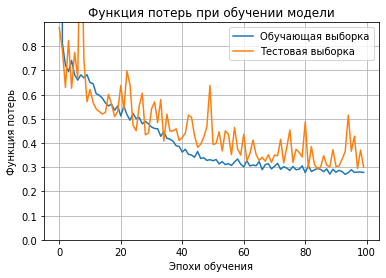

In [171]:
plot_loss(history)

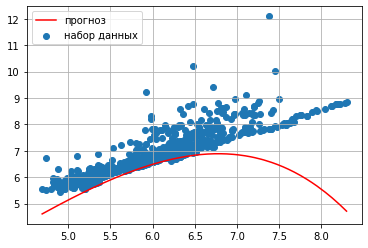

In [154]:
# выполним прогноз, построив диаграмму рассеяния набора данных и линии регрессии
y_predict_reg2 = reg2_model.predict(x2)

plt.scatter(x, y, label='набор данных')
plt.plot(np.sort(x), y_predict_reg2[np.argsort(x)], color='r', label='прогноз')
plt.legend(loc='upper left')
plt.grid();

In [155]:
# найдем максимальную дисперсию для каждого признака
for x in df:
  print(x, np.var(df[x]))
# макс. дисперсию имеет признак year

doy 39.109458923339844
temp 0.4664565622806549
temp_lower 0.5802018046379089
temp_upper 0.6584841012954712
year 84644.67611391594


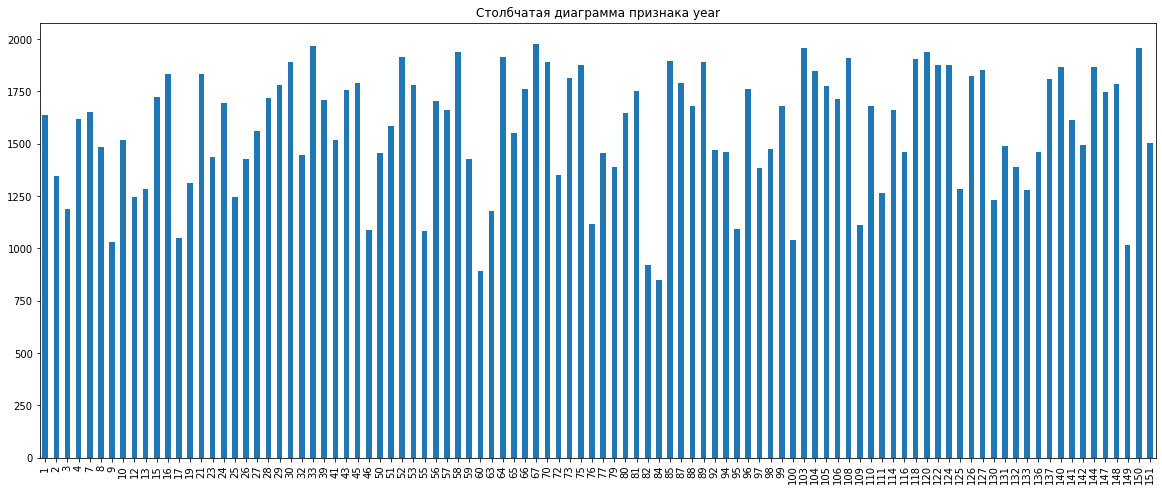

In [156]:
# визуализируем этот признак с помощью столбчатой диаграммы
df['year'][:100].plot(kind="bar", title='Столбчатая диаграмма признака year', figsize=(20,8))

In [157]:
# сформируем набор данных из 2-х признаков
norm_features = np.array(df[['temp','year']])
# создадим и адаптируем нормализирующий слой для этих признаков
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,)) 
feature_normalizer.adapt(norm_features)

In [158]:
# построим нейронную сеть
#Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – гиперболический тангенс.
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

large_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 64)                192       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                      

In [159]:
large_model.compile(loss='mse')

In [160]:
# обучим эту сеть на наборе данных из 2-х признаков и зависимого признака
history = large_model.fit(
    norm_features, y, 
    epochs=100,
    verbose=1,
    validation_split = 0.3)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 8.9846 - val_loss: 0.8764
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8126 - val_loss: 0.7849
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7215 - val_loss: 0.6294
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6945 - val_loss: 0.8235
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7414 - val_loss: 0.6262
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6813 - val_loss: 0.7747
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6677
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6815 - val_loss: 1.4396
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6694 - val_loss: 0.7445
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6824 - val_loss: 0.5708
Epoch 11

In [161]:
# визуализируем набор данных в виде точечного графика
# и прогноз сети в виде поверхности
# используем 3D  график
from mpl_toolkits import mplot3d

In [162]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [163]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [164]:
z = large_model.predict(xy_2)
z.shape

(2601, 1)

In [165]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

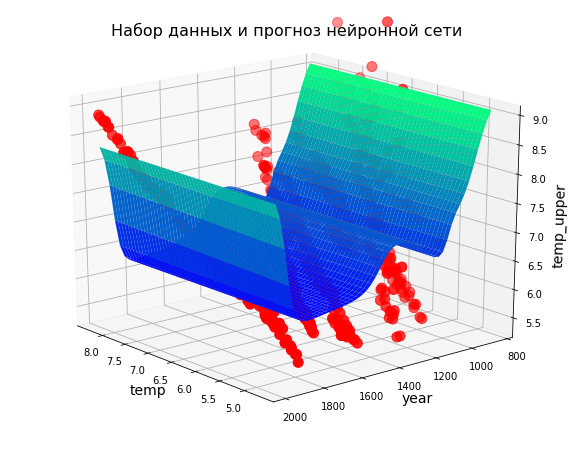

In [166]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('temp', fontsize=14) 
ax.set_ylabel('year', fontsize=14)
ax.set_zlabel('temp_upper', fontsize=14) 
ax.set_title('Набор данных и прогноз нейронной сети', fontsize=16)

ax.set_zlim(z_mesh.min()-1, z_mesh.max())
ax.view_init(elev = 20, azim = 140)

In [167]:
# разобьем набор данных на обучающую и тестовую выборки
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [168]:
X_train, X_test, y_train, y_test = train_test_split(norm_features, y, 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((551, 2), (236, 2), (551,), (236,))

In [180]:
def my_mae(y_test, y_predict):
    return np.sum(np.absolute(y_predict - y_test))/len(y_test)

In [181]:
# построим кривые обучения
train_score = []
test_score = []
for i in range(11, 551, 10):
    large_model = tf.keras.Sequential([
        feature_normalizer,
#        tf.keras.layers.Dense(units=64, activation='relu'),
#        tf.keras.layers.Dense(units=64, activation='relu'),
#        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mae')
    large_model.fit(X_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(my_mae(y_train[:i], y_train_predict))
    
    y_test_predict = large_model.predict(X_test)
    test_score.append(my_mae(y_test, y_test_predict))
    print('-->', i, ' done')

--> 11  done
--> 21  done
--> 31  done
--> 41  done
--> 51  done
--> 61  done
--> 71  done
--> 81  done
--> 91  done
--> 101  done
--> 111  done
--> 121  done
--> 131  done
--> 141  done
--> 151  done
--> 161  done
--> 171  done
--> 181  done
--> 191  done
--> 201  done
--> 211  done
--> 221  done
--> 231  done
--> 241  done
--> 251  done
--> 261  done
--> 271  done
--> 281  done
--> 291  done
--> 301  done
--> 311  done
--> 321  done
--> 331  done
--> 341  done
--> 351  done
--> 361  done
--> 371  done
--> 381  done
--> 391  done
--> 401  done
--> 411  done
--> 421  done
--> 431  done
--> 441  done
--> 451  done
--> 461  done
--> 471  done
--> 481  done
--> 491  done
--> 501  done
--> 511  done
--> 521  done
--> 531  done
--> 541  done


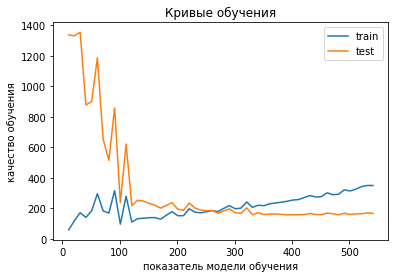

In [185]:
plt.plot([i for i in range(11, len(X_train), 10)], 
                               train_score, label="train")
plt.plot([i for i in range(11, len(X_train), 10)], 
                               test_score, label="test")
plt.title('Кривые обучения')
plt.xlabel('показатель модели обучения')
plt.ylabel('качество обучения')
plt.legend();